In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from scipy.spatial.distance import cdist

original_df = pd.read_csv("Data/usa_county_wise.csv")

In [3]:
original_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [4]:
dataframe = original_df.copy(deep=True)

In [5]:
dataframe.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [6]:
dataframe = dataframe.drop(['UID', 'Combined_Key','Country_Region', 'Admin2', 'iso3', 'code3'], axis = 1)

In [7]:
# dataframe = dataframe.drop(['Lat', 'Long_'], axis = 1)
dataframe.head()

,iso2,FIPS,Province_State,Lat,Long_,Date,Confirmed,Deaths
0,AS,60.0,American Samoa,-14.271000,-170.132000,1/22/20,0,0
1,GU,66.0,Guam,13.444300,144.793700,1/22/20,0,0
2,MP,69.0,Northern Mariana Islands,15.097900,145.673900,1/22/20,0,0
3,PR,72001.0,Puerto Rico,18.180117,-66.754367,1/22/20,0,0
4,PR,72003.0,Puerto Rico,18.360255,-67.175131,1/22/20,0,0


In [8]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [9]:
dataframe.head()

,iso2,FIPS,Province_State,Lat,Long_,Date,Confirmed,Deaths
0,AS,60.0,American Samoa,-14.271000,-170.132000,2020-01-22,0,0
1,GU,66.0,Guam,13.444300,144.793700,2020-01-22,0,0
2,MP,69.0,Northern Mariana Islands,15.097900,145.673900,2020-01-22,0,0
3,PR,72001.0,Puerto Rico,18.180117,-66.754367,2020-01-22,0,0
4,PR,72003.0,Puerto Rico,18.360255,-67.175131,2020-01-22,0,0


In [10]:
dataframe.groupby(dataframe['Date'].dt.strftime('%B'))['Deaths'].sum().sort_values()

Date
January           0
February          1
March         26160
April       1035013
May         2728676
June        3518537
July        3703024
Name: Deaths, dtype: int64

In [11]:
dataframe['Year'] = dataframe['Date'].dt.year
dataframe['Month'] = dataframe['Date'].dt.month

In [12]:
dataframe.dropna()
dataframe.head()


,iso2,FIPS,Province_State,Lat,Long_,Date,Confirmed,Deaths,Year,Month
0,AS,60.0,American Samoa,-14.271000,-170.132000,2020-01-22,0,0,2020,1
1,GU,66.0,Guam,13.444300,144.793700,2020-01-22,0,0,2020,1
2,MP,69.0,Northern Mariana Islands,15.097900,145.673900,2020-01-22,0,0,2020,1
3,PR,72001.0,Puerto Rico,18.180117,-66.754367,2020-01-22,0,0,2020,1
4,PR,72003.0,Puerto Rico,18.360255,-67.175131,2020-01-22,0,0,2020,1


In [13]:
total = sum(dataframe['Deaths'])

In [14]:
total

11011411

In [15]:
dataframe = dataframe.dropna()

In [16]:
dataframe['FIPS'].describe()

count    626040.000000
mean      33061.684685
std       18636.156825
min          60.000000
25%       19079.000000
50%       31014.000000
75%       47131.000000
max       99999.000000
Name: FIPS, dtype: float64

In [17]:
def get_final_counts_from_df(df, key, typeval, sortkey):
    fips = df[key].astype(typeval).unique()
    l = []
    for each in fips:
        d = df[df[key] == each].sort_values(by=sortkey)
        if len(d) > 0:
            l.append(d.iloc[-1])
        else:
            print("Error ", d)
    print(len(l))
    s = pd.DataFrame(l)
    return s
d = get_final_counts_from_df(dataframe, "FIPS", "int", "Date")

3330


In [18]:
d

,iso2,FIPS,Province_State,Lat,Long_,Date,Confirmed,Deaths,Year,Month
624580,AS,60.0,American Samoa,-14.271000,-170.132000,2020-07-27,0,0,2020,7
624581,GU,66.0,Guam,13.444300,144.793700,2020-07-27,349,5,2020,7
624582,MP,69.0,Northern Mariana Islands,15.097900,145.673900,2020-07-27,40,2,2020,7
624583,PR,72001.0,Puerto Rico,18.180117,-66.754367,2020-07-27,77,0,2020,7
624584,PR,72003.0,Puerto Rico,18.360255,-67.175131,2020-07-27,92,0,2020,7
...,...,...,...,...,...,...,...,...,...,...
627905,US,90053.0,Washington,0.000000,0.000000,2020-07-27,173,0,2020,7
627906,US,90054.0,West Virginia,0.000000,0.000000,2020-07-27,0,0,2020,7
627907,US,90055.0,Wisconsin,0.000000,0.000000,2020-07-27,0,0,2020,7
627908,US,90056.0,Wyoming,0.000000,0.000000,2020-07-27,0,0,2020,7


In [19]:
dbscan_ds = d[['Lat', 'Long_', 'Confirmed', 'Deaths']]
dbscan_ds.describe()

,Lat,Long_,Confirmed,Deaths
count,3330.000000,3330.000000,3330.000000,3330.000000
mean,36.721454,-88.617244,1283.208709,44.401802
std,9.030193,21.618761,6854.037616,449.112578
min,-14.271000,-174.159600,0.000000,0.000000
25%,33.893441,-97.780500,39.000000,0.000000
50%,37.995839,-89.456721,151.000000,2.000000
75%,41.587421,-82.313398,567.000000,12.000000
max,69.314792,145.673900,224051.000000,23500.000000


In [20]:
db = DBSCAN(eps=50/6371., min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(dbscan_ds[['Lat', 'Long_']]), dbscan_ds[['Deaths']])

NameError: name 'DBSCAN' is not defined

In [21]:
coords = dbscan_ds[['Lat', 'Long_']].to_numpy()
num_clusters = len(set(db.labels_))

NameError: name 'db' is not defined

In [22]:
clusters = pd.Series([coords[db.labels_ == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

NameError: name 'num_clusters' is not defined

In [ ]:
num_clusters

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
iso2_dummies = pd.get_dummies(d['iso2'])

In [ ]:
iso2_dummies

In [ ]:
province_dummies = pd.get_dummies(d['Province_State'])

In [ ]:
province_dummies

In [ ]:
categorical_data = ['iso2', 'Province_State']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('onehot', one_hot, categorical_data)], remainder = "passthrough")
X = d.drop(['Confirmed', 'Deaths', 'FIPS','Date'], axis = 1)
transformed_X = transformer.fit_transform(X)


In [ ]:
transformed_X

In [ ]:
newFrame = pd.DataFrame(transformed_X)

In [ ]:
newFrame.head()

In [ ]:
iso2 = pd.DataFrame(iso2_dummies)
prov = pd.DataFrame(province_dummies)

In [ ]:
d = d.join(iso2)

In [ ]:
d = d.join(prov)

In [ ]:
d = d.drop(['iso2', 'Province_State'], axis = 1)

In [ ]:
d = d.drop('Date', axis = 1)

In [48]:
from sklearn.cluster import KMeans
import numpy as np

In [49]:
from sklearn.datasets import make_blobs

In [24]:
X = d[0:2000]

In [25]:
original_df[original_df['Lat'] == X.iloc[203,0]]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths


In [26]:
original_df[original_df["Lat"] == X.iloc[203,0]]['Deaths'].mean()

nan

In [27]:
# Manhattan distance

In [28]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('manhattan')

In [29]:
d.shape, d_man.shape

NameError: name 'd_man' is not defined

In [30]:
d_man = dist.pairwise(d[['Lat', 'Long_']])

In [31]:
d_man[:5]

array([[  0.      , 342.641   , 345.1748  , ..., 184.403   , 184.403   ,
        184.403   ],
       [342.641   ,   0.      ,   2.5338  , ..., 158.238   , 158.238   ,
        158.238   ],
       [345.1748  ,   2.5338  ,   0.      , ..., 160.7718  , 160.7718  ,
        160.7718  ],
       [135.82875 , 216.283884, 215.510484, ...,  84.934484,  84.934484,
         84.934484],
       [135.588124, 216.884786, 216.111386, ...,  85.535386,  85.535386,
         85.535386]])

In [32]:
pd.DataFrame(d_man).head()

,0,1,2,3,4,5,6,7,8,9,...,3320,3321,3322,3323,3324,3325,3326,3327,3328,3329
0,0.000000,342.641000,345.174800,135.828750,135.588124,135.741866,136.527813,136.270230,135.570374,136.134554,...,184.403000,184.403000,184.403000,184.403000,184.403000,184.403000,184.403000,184.403000,184.403000,184.403000
1,342.641000,0.000000,2.533800,216.283884,216.884786,216.929896,215.727825,215.744892,216.757996,216.431108,...,158.238000,158.238000,158.238000,158.238000,158.238000,158.238000,158.238000,158.238000,158.238000,158.238000
2,345.174800,2.533800,0.000000,215.510484,216.111386,216.156496,214.954425,214.971492,215.984596,215.657708,...,160.771800,160.771800,160.771800,160.771800,160.771800,160.771800,160.771800,160.771800,160.771800,160.771800
3,135.828750,216.283884,215.510484,0.000000,0.600902,0.646012,0.699063,0.538992,0.474112,0.305804,...,84.934484,84.934484,84.934484,84.934484,84.934484,84.934484,84.934484,84.934484,84.934484,84.934484
4,135.588124,216.884786,216.111386,0.600902,0.000000,0.153742,1.156961,1.139894,0.126790,0.546430,...,85.535386,85.535386,85.535386,85.535386,85.535386,85.535386,85.535386,85.535386,85.535386,85.535386


In [33]:
without_lat_long = d.drop(columns=['Lat', 'Long_', 'iso2', 'FIPS', 'Province_State', 'Date', 'Year', 'Month'], axis=1)

In [34]:
without_lat_long.shape

(3330, 2)

In [35]:
dx = pd.DataFrame(d_man)

In [36]:
without_lat_long.reset_index(drop=True, inplace=True)


In [37]:
without_lat_long.head()

,Confirmed,Deaths
0,0,0
1,349,5
2,40,2
3,77,0
4,92,0


In [38]:
new = pd.concat([without_lat_long, dx], axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
stdScaler = StandardScaler()

In [41]:
std = stdScaler.fit_transform(new)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(std)

In [152]:
principalComponents[1]

array([561.48896459,  30.64446797])

In [43]:
principalComponents.shape

(3330, 2)

In [44]:
train = principalComponents[:2000]

In [45]:
test = principalComponents[2000:]

In [73]:
inertias = []
distortion = []
sil_score = []
for i in range(10,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    label = kmeans.fit_predict(principalComponents)
    inertias.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(principalComponents, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / principalComponents.shape[0])
    sil_score.append(silhouette_score(principalComponents, kmeans.labels_, metric='euclidean'))
#     plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=label, s=50, cmap='viridis')
#     plt.show()


Sil score  0.35756359427015355


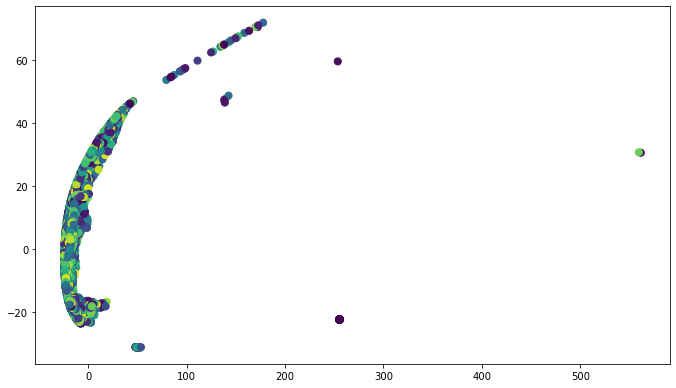

In [136]:
kmeans = KMeans(n_clusters=500, random_state=19)
label = kmeans.fit_predict(principalComponents)
print("Sil score ", silhouette_score(principalComponents, kmeans.labels_, metric='chebyshev'))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=label, s=50, cmap='viridis')
plt.show()


In [137]:
kmeans.predict(principalComponents[2300].reshape(1,-1))

array([153], dtype=int32)

In [146]:
kmeans.labels_

array([ 17,   7, 387, ...,   1,   1,   1], dtype=int32)

In [153]:
principalComponents[kmeans.cluster_centers_[0]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [149]:
plt.rcParams["figure.figsize"] = [9.50, 5.50]
plt.rcParams["figure.autolayout"] = True
x = np.arange(1, 51, 1)

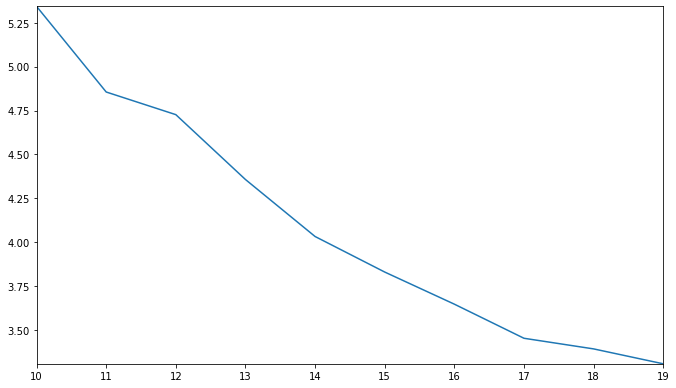

In [150]:
plt.margins(x=0, y=0)
plt.plot(range(10,20),distortion)


In [59]:
cluster_24 = X[labels == 24]

NameError: name 'labels' is not defined

In [ ]:
len(cluster_24)

In [ ]:
cl_24_lat_1 = cluster_24.iloc[1, :]['Lat']
cl_24_long_1 = cluster_24.iloc[1, :]['Long_']
cl_24_lat_1, cl_24_long_1

In [ ]:
cl_24_lat_2 = cluster_24.iloc[3, :]['Lat']
cl_24_long_2 = cluster_24.iloc[3, :]['Long_']
cl_24_lat_2, cl_24_long_2

In [ ]:
original_df[original_df.Lat.eq(cl_24_lat_2) & original_df.Long_.eq(cl_24_long_2)]

In [ ]:
original_df[original_df.Lat.eq(cl_24_lat_1) & original_df.Long_.eq(cl_24_long_1)]

In [ ]:
filtered_label0 = X[label == 0]

In [ ]:
u_labels = np.unique(label)

In [ ]:
X.iloc[:, 0]

In [ ]:
kmeans.predict(d[["Lat", "Long_", "Confirmed", "Deaths"]][2001:3000])

In [141]:
kmeans.cluster_centers_

array([[-1.16324181e+01,  1.99010254e+01],
       [ 2.55315671e+02, -2.23119169e+01],
       [-1.07751113e+01, -1.95084091e+01],
       [ 1.37906327e+02,  6.49792385e+01],
       [ 4.24144456e+01,  4.62152022e+01],
       [ 5.01042858e+01, -3.12254535e+01],
       [-2.39410816e+01, -3.19346578e+00],
       [ 5.61488965e+02,  3.06444680e+01],
       [ 1.49767309e+01,  3.50202554e+01],
       [-1.82693565e+01,  7.60950806e+00],
       [-2.06550937e+01, -1.40965872e+01],
       [-3.58797281e+00, -1.85922115e+01],
       [ 8.40887803e+01,  5.47050625e+01],
       [ 1.64567434e+00,  2.72697541e+01],
       [ 2.45905824e+01,  4.04602290e+01],
       [-6.15637186e+00,  1.57438342e+01],
       [-1.61591797e+01, -4.90139698e+00],
       [ 2.53582565e+02,  5.96653305e+01],
       [-1.37915791e+01,  1.50195311e+01],
       [ 1.63455892e+02,  6.93900644e+01],
       [-2.13512487e+01,  1.75877674e+00],
       [-1.70882433e+01, -1.84128641e+01],
       [-3.31692120e-01, -1.68815721e+01],
       [-2.

In [ ]:
labels = kmeans.labels_

In [ ]:
labels

In [ ]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = “k”
    
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], “o”, markerfacecolor=col,
    markeredgecolor=”k”, markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], “o”, markerfacecolor=col,
    markeredgecolor=”k”, markersize=5)
plt.title(“Estimated number of clusters: %d” % n_clusters_)
plt.show()

In [ ]:
X.head()

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(principalComponents, kmeans.labels_, metric='euclidean')

In [ ]:
print('Silhouette Score: %.3f' % score)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
X

In [ ]:
from sklearn.cluster import Birch
brc = Birch(n_clusters = 50)
brc.fit(X)
pred = brc.predict(X)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
db = DBSCAN(eps=3, min_samples=2).fit(X)
len(db.labels_)

In [ ]:


# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

n_clusters

In [ ]:
n_noise

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [86]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini = MiniBatchKMeans(n_clusters=500).fit(principalComponents)

In [87]:
kmeans_mini.predict(principalComponents[2300].reshape(1,-1))

array([163], dtype=int32)

In [88]:
mini_score = score = silhouette_score(principalComponents, kmeans_mini.labels_, metric='euclidean')

In [89]:
mini_score

0.3213592226485529

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans_mini, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# DBSCAN

In [ ]:
original_df[['Lat', 'Long_', 'Confirmed', 'Deaths']]

## Predicting covid deaths

1. Multi-linear regression
2. Neural networks
3. Decision Tree
4. Random forests


In [ ]:
original_df.head()

In [ ]:
data = original_df[["Province_State", "Confirmed", "Deaths"]]

In [ ]:
data.head()

# Need to clean data to the following cols:
1. State
2. Confirmed ( total for county )
3. Deaths ( total for county )
4. Mean Confirmed cases in the last 10 days
5. Mean Confirmed cases in the last 45 days